# Unsteady flow around a cylinder ($Re=200$)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1 = ib.stretching(256, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
s2 = ib.stretching(128, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
x = np.r_[-s2[::-1], s1[1:]]

s = ib.stretching(192, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
y = np.r_[-s[::-1], s[1:]]

solver = ib.Solver(x, y, iRe=1/200.0, Co=0.4)

## Immersed boundaries

In [4]:
solver.set_solids(ib.shapes.cylinder("cylinder", 0, 0, 0.5, solver.dxmin))

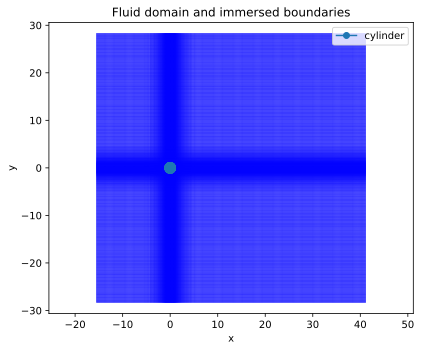

In [5]:
solver.plot_domain(figsize=(6, 5));

## Boundary conditions

In [6]:
uBC, vBC = solver.zero_boundary_conditions()
for k in range(4):
    uBC[k][:] = 1

sBC = ((np.zeros(solver.solids[0].l), np.zeros(solver.solids[0].l)), )

## Unsteady simulation

In [11]:
%time x, = solver.steps(solver.zero(), uBC, vBC, sBC, outflowEast=True, 
                        number=int(200/solver.dt), reportEvery=int(5/solver.dt))

  step      t        residual   cylinder(fx) cylinder(fy) Uinf@outlet 
   378    4.989600 2.625554e-04  1.124593254  0.000000000  1.000000000 
   756    9.979200 1.354633e-04  1.003281250 -0.000000000  1.000000000 
  1134   14.968800 9.386197e-05  0.954600494  0.000000000  1.000000000 
  1512   19.958400 7.300687e-05  0.929422385 -0.000000000  1.000000000 
  1890   24.948000 5.998516e-05  0.914648063  0.000000000  1.000000000 
  2268   29.937600 5.116550e-05  0.905205722 -0.000000000  1.000000000 
  2646   34.927200 4.478522e-05  0.898743464 -0.000000000  1.000000000 
  3024   39.916800 3.989897e-05  0.894077030  0.000000000  1.000000000 
  3402   44.906400 3.580635e-05  0.890559251 -0.000000000  1.000000000 
  3780   49.896000 3.218590e-05  0.887811773  0.000000000  1.000000000 
  4158   54.885600 2.909698e-05  0.885600358 -0.000000000  1.000000000 
  4536   59.875200 2.640661e-05  0.883771691  0.000000000  1.000000000 
  4914   64.864800 2.400204e-05  0.882224367 -0.000000000  1.0000

## Display results

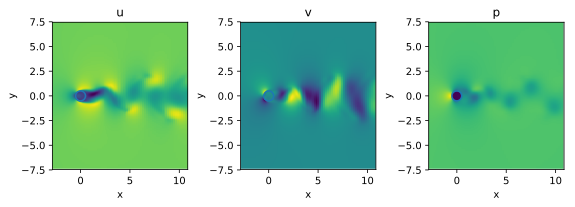

In [16]:
solver.plot_field(x, equal=True, xlim=(-2, 10), ylim=(-2, 2));